In [227]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/stepik/m4. inference/w3. dependencies'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/stepik/m4. inference/w3. dependencies
'3.5 multiple tests.ipynb'   beauty.csv		     illiteracy.ipynb
'3.6.3 auc.ipynb'	     botswana.tsv	     illiteracy.txt
'3.8 botswana.ipynb'	     correlation.ipynb	     water.ipynb
'3.8 regression.ipynb'	     foodmart.products.tsv   water.txt
 AUCs.txt		     foodmart.sales.tsv


In [228]:
!pip install -U patsy

Requirement already up-to-date: patsy in /usr/local/lib/python3.7/dist-packages (0.5.1)


In [229]:
import warnings
warnings.filterwarnings('ignore')

In [230]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [231]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [232]:
data = pd.read_csv('botswana.tsv', sep='\t')
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [233]:
data.religion.value_counts().shape
data.shape

(4361, 15)

In [234]:
data.dropna().shape

(1834, 15)

In [235]:
data = pd.read_csv('botswana.tsv', sep='\t')
data['nevermarr'] = data['agefm'].apply(lambda x: int(x != x))
data.loc[data['nevermarr'] == 1, 'heduc'] = data.loc[data['nevermarr'] == 1, 'heduc'].fillna(-1)
data.drop('evermarr', axis=1, inplace=True)
data['agefm'].fillna(0, inplace=True)
cols = {'idlnchld': -1, 'heduc': -2, 'usemeth':-1}
for c in cols.keys():
    data[c + '_noans'] = data[c].apply(lambda x: int(x != x))
    data[c].fillna(cols.get(c), inplace=True)
data.isna().sum(axis=0)
data.dropna(inplace=True)
data.shape[0] * data.shape[1]

78264

In [236]:
formula = 'ceb ~ ' + ' + '.join(data.columns.values.tolist()[1:])
m1 = smf.ols(formula, data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:04:40   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [237]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [238]:
# data.drop(['religion', 'radio', 'tv'], axis=1, inplace=True)
columns = data.columns.values.tolist()
columns = list(set(columns) - {'religion', 'radio', 'tv', 'ceb'})
print(columns)

['nevermarr', 'heduc', 'knowmeth', 'urban', 'bicycle', 'heduc_noans', 'educ', 'agefm', 'usemeth_noans', 'electric', 'age', 'idlnchld', 'idlnchld_noans', 'usemeth']


In [239]:
formula = 'ceb ~ ' + ' + '.join(columns)
print(formula)
m2 = smf.ols(formula, data=data)
fitted = m2.fit()
print(fitted.summary())

ceb ~ nevermarr + heduc + knowmeth + urban + bicycle + heduc_noans + educ + agefm + usemeth_noans + electric + age + idlnchld + idlnchld_noans + usemeth
                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:04:42   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t

In [225]:
print(sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

1.1197458896536614e-228


In [240]:
m3 = smf.ols(formula, data=data)
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:05:00   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [201]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m3.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [ ]:
columns.remove('usemeth_noans')
columns.remove('usemeth')

In [ ]:
formula = 'ceb ~ ' + ' + '.join(columns)
m4 = smf.ols(formula, data=data)
fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

In [209]:
print(m3.fit().compare_f_test(m4.fit()))

(92.89058230109711, 3.155200948040263e-40, 2.0)


Ошибки гетероскедастичны, значит, значимость признаков может определяться неверно. Сделаем поправку Уайта:

### Удаляем незначимые признаки

В предыдущей модели незначимы: цвет кожи, здоровье, семейное положение. Удалим их. Индикатор привлекательности выше среднего тоже незначим, но удалять его не будем, потому что это одна из переменных, по которым на нужно в конце ответить на вопрос.

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     121.1
Date:                Wed, 03 Jul 2019   Prob (F-statistic):          6.49e-150
Time:                        19:35:34   Log-Likelihood:                -799.30
No. Observations:                1259   AIC:                             1617.
Df Residuals:                    1250   BIC:                             1663.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3906      0

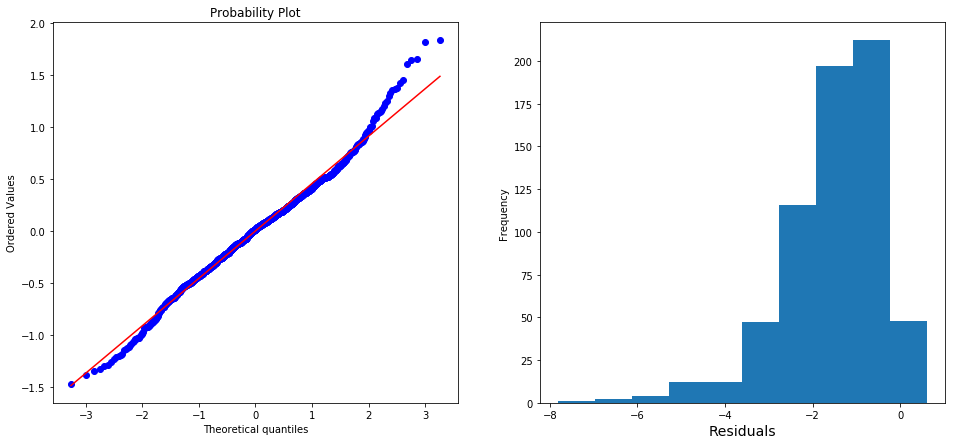

In [ ]:
m5 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) + union + female + service + educ +'\
                            'belowavg + aboveavg', data=data)
fitted = m5.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

Посмотрим, не стала ли модель от удаления трёх признаков значимо хуже, с помощью критерия Фишера:

In [ ]:
print("F=%f, p=%f, k1=%f" % m4.fit().compare_f_test(m5.fit()))

F=1.611478, p=0.184911, k1=3.000000


Не стала.

Проверим, нет ли наблюдений, которые слишком сильно влияют на регрессионное уравнение:

<Figure size 576x504 with 0 Axes>

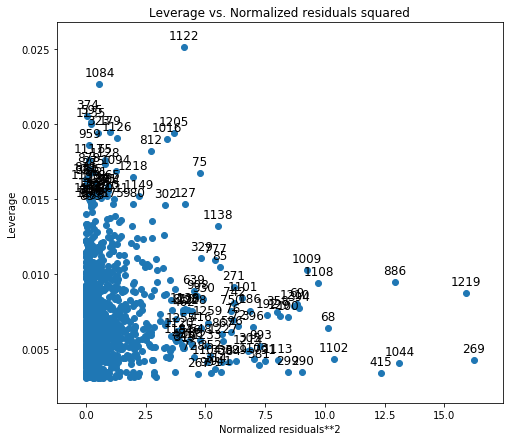

In [ ]:
plt.figure(figsize(8,7))
plot_leverage_resid2(fitted)
pylab.show()

In [ ]:
data.loc[[1122]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
1122,6.25,47,0,0,1,1,1,0,5,0,1


In [ ]:
data.loc[[269]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
269,41.67,16,0,0,0,0,1,0,13,0,1


## Выводы

Итоговая модель объясняет 40% вариации логарифма отклика. 

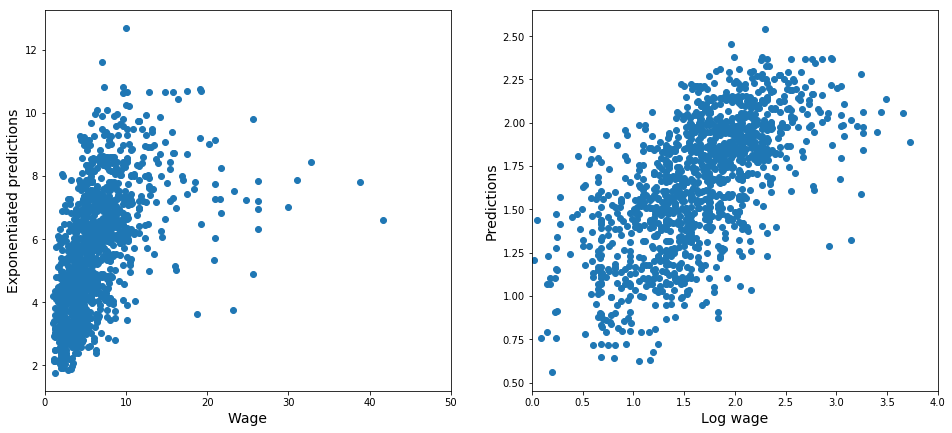

In [ ]:
plt.figure(figsize(16,7))
plt.subplot(121)
scatter(data['wage'],np.exp(fitted.fittedvalues))
plt.xlabel('Wage', fontsize=14)
plt.ylabel('Exponentiated predictions', fontsize=14)
plt.xlim([0,50])

plt.subplot(122)
scatter(np.log(data['wage']),fitted.fittedvalues)
plt.xlabel('Log wage', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xlim([0,4])
pylab.show()

При интересующих нас факторах привлекательности стоят коэффициенты -0.1307 (ниже среднего) и -0.0010 (выше среднего). 

Поскольку регрессия делалась на логарифм отклика, интерпретировать их можно как прирост в процентах. С учётом дополнительных факторов представители генеральной совокупности, из которой взята выборка, получают в среднем:

* на 13% меньше, если их привлекательность ниже среднего (p=0.001, 95% доверительный интервал — [5,21]%);
* столько же, если их привлекательность выше среднего (p=0.972, 95% доверительный интервал — [-6,6]%).